## <b> <span style='color:#2ae4f5'>|</span> Generating Anime Faces with DCGAN: A Dataset of High-Quality Anime  </b> 

## <b>1 <span style='color:#2ae4f5'>|</span> Import Libraries </b> 

In [1]:
# import requirement libraries and tools
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Conv2DTranspose, Reshape, BatchNormalization, ReLU, LeakyReLU,Activation
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from PIL import Image
from tensorflow.keras.callbacks import ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

## <b>2 <span style='color:#2ae4f5'>|</span> Processing and Import DataSet </b> 

In [2]:
# Loading and Preparing Anime Face Images Dataset using Keras Image Data Generator
img_width, img_height = 256,256
batchsize = 32

# tải hình ảnh từ một mục và tự đống gán nhãn
train = keras. utils.image_dataset_from_directory(
    directory='../DCGAN/',
    batch_size = batchsize,
    image_size = (img_width, img_height))

Found 26388 files belonging to 2 classes.



## <b>3 <span style='color:#2ae4f5'>|</span> Preprocessing </b> 

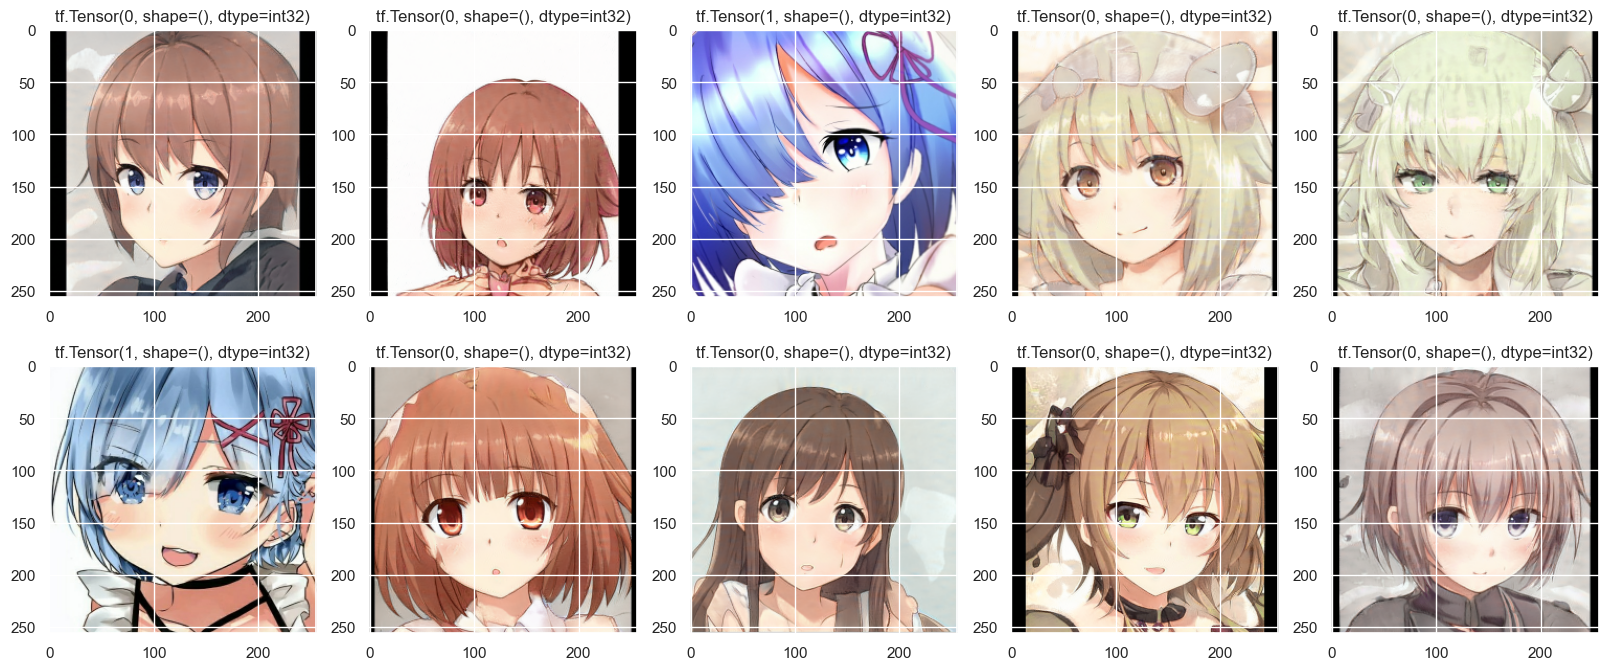

In [24]:
# Visualizing a Batch of Anime Face Images

data_iterator = iter(train) # chuyển thành iterator để duyệt, lấy dữ liệu theo từng lô
batch = next(data_iterator) # lấy một lô hình ảnh từ iterator, chứa hình ảnh và label tương ứng
num_images=10
fig, ax = plt.subplots(nrows=2,ncols=5 ,figsize=(20,8))
# Hiển thị hình ảnh
for idx in range(num_images):
    row = idx // 5  # Xác định hàng (row)
    col = idx % 5   # Xác định cột (column)
    ax[row, col].imshow(batch[0][idx].numpy().astype(int))
    if batch[1] is not None:
        ax[row, col].title.set_text(batch[1][idx])
    else:
        ax[row, col].title.set_text(f"Image {idx+1}")

In [3]:
# Generating Augmented Batches of Anime Face Images using ImageDataGenerator
DIR = '../DCGAN/' #path

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
def preprocess_input(x):
    x = x / 127.5 - 1  # Scale các giá trị vào khoảng [-1, 1]
    return x

# Tạo ImageDataGenerator với preprocessing_function
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
        DIR,
        target_size = (64, 64),
        batch_size = batchsize,
        class_mode = None)

#train_generator[0]

Found 26388 images belonging to 2 classes.



<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''>|</span></b> Deep Convolutional Generative Adversarial Network </b></p>
</div>

**DCGAN (Deep Convolutional Generative Adversarial Network)** is an advanced architecture and training methodology for **generative adversarial networks (GANs)** specifically designed for image synthesis tasks. It combines **deep convolutional neural networks** with the **adversarial learning framework** to **generate high-quality and realistic images**.


## <b>4 <span style='color:#2ae4f5'>|</span> Create Generator </b> 


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''>|</span></b> The Generator </b></p>
</div>

In **DCGAN**, the **generator** and **discriminator** networks play crucial roles. **The generator** is responsible for generating synthetic images that resemble the target data distribution. It takes random noise as input and gradually transforms it into higher-dimensional outputs using convolutional layers, transposed convolutions, and activation functions like ReLU. Batch normalization is often used to stabilize the learning process.

In [25]:
# Creating the Generator Model 

KI = tf.keras.initializers.HeNormal()
input_dim = 300

def Generator_Model():

    Generator = Sequential()

    # Random noise
    Generator.add(Dense(8 * 8 * 256, input_dim = input_dim))
    Generator.add(LeakyReLU())
    # Convert 1d to 3d
    Generator.add(Reshape((8, 8, 256)))
    # Unsample
    Generator.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI))
    # Generator.add(BatchNormalization())
    Generator.add(LeakyReLU())

    Generator.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI))
    # Generator.add(BatchNormalization())
    Generator.add(LeakyReLU())

    Generator.add(Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI))
    # Generator.add(BatchNormalization())
    Generator.add(LeakyReLU())

    Generator.add(Conv2DTranspose(3, (4, 4), padding='same'))
    # Generator.add(BatchNormalization())
    Generator.add(Activation('tanh'))

    
    return Generator
    
generator = Generator_Model()
generator.summary()
# Visualized Layers of generator
# keras.utils.plot_model(generator, show_shapes=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16384)             4931584   
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 16384)             0         
                                                                 
 reshape_5 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_20 (Conv2D  (None, 16, 16, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 32, 32, 64)       131136    
 Transpose)                                           

## <b>6 <span style='color:#2ae4f5'>|</span> Create Discriminator </b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''>|</span></b> The Discriminator </b></p>
</div>

**The discriminator**, on the other hand, aims to distinguish between real and generated images. It utilizes convolutional layers, activation functions, and strided convolutions to downsample the spatial dimensions and capture image features. The discriminator is trained to maximize its ability to correctly classify images as real or fake.

In [26]:
# Creating the discriminator Model 

def Discriminator_Model():
    input_shape = (64, 64, 3)

    # Create a Sequential model
    discriminator = Sequential()
    discriminator.add(Conv2D(32,kernel_size=(3, 3), activation='LeakyReLU', input_shape = input_shape))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(64, kernel_size=(3, 3), activation='LeakyReLU'))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(128, kernel_size=(3, 3), activation='LeakyReLU'))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Flatten())
    discriminator.add(Dense(128, activation='LeakyReLU'))
    discriminator.add(Dense(1, activation='sigmoid'))

    return discriminator

# Training The CNN
discriminator = Discriminator_Model()
discriminator.summary()  
# Visualized Layers of discriminator
# keras.utils.plot_model(discriminator, show_shapes=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 128)       

## <b>7 <span style='color:#2ae4f5'>|</span> Create Deep Convolutional GAN </b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''>|</span></b> The Training Process </b></p>
</div>

The training process of **DCGAN** involves an adversarial interplay between the **generator** and **discriminator**. **The generator** aims to generate increasingly realistic images to deceive the **discriminator**, while the discriminator strives to improve its **discrimination ability**. This iterative process continues until the generator produces images that are visually convincing and indistinguishable from real images.
During training, the generator and discriminator networks are updated using techniques like **stochastic gradient descent (SGD)** or **Adam** optimization. The **Binary Cross Entropy loss function** is commonly used to compute the difference between predicted probabilities and target labels for both networks.

In [29]:
# DCGAN Model Training Step with Discriminator and Generator

class DCGAN(keras.Model):
    def __init__(self, generator, discriminator, latent_dim = input_dim):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
        self.g_loss_metric = keras.metrics.Mean(name='g_loss')
        self.d_loss_metric = keras.metrics.Mean(name='d_loss')
        
    @property
    def metrics(self):
        return [self.g_loss_metric, self.d_loss_metric]
    
    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(DCGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn
        
    def train_step(self, real_images):
        # get batch size from the data
        batch_size = tf.shape(real_images)[0]
        # generate random noise
        random_noise = tf.random.normal(shape=(batch_size, self.latent_dim))
        
        # train the discriminator with real (1) and fake (0) images
        with tf.GradientTape() as tape:
            # compute loss on real images
            pred_real = self.discriminator(real_images, training=True)
            # generate real image labels
            real_labels = tf.ones((batch_size, 1))
            # label smoothing
            real_labels += 0.05 * tf.random.uniform(tf.shape(real_labels))
            d_loss_real = self.loss_fn(real_labels, pred_real)
            
            # compute loss on fake images
            fake_images = self.generator(random_noise)
            pred_fake = self.discriminator(fake_images, training=True)
            # generate fake labels
            fake_labels = tf.zeros((batch_size, 1))
            d_loss_fake = self.loss_fn(fake_labels, pred_fake)
            
            # total discriminator loss
            d_loss = (d_loss_real + d_loss_fake) / 2
            
        # compute discriminator gradients
        gradients = tape.gradient(d_loss, self.discriminator.trainable_variables)
        # update the gradients
        self.d_optimizer.apply_gradients(zip(gradients, self.discriminator.trainable_variables))
        
        
        # train the generator model
        labels = tf.ones((batch_size, 1))
        # generator want discriminator to think that fake images are real
        with tf.GradientTape() as tape:
            # generate fake images from generator
            fake_images = self.generator(random_noise, training=True)
            # classify images as real or fake
            pred_fake = self.discriminator(fake_images, training=True)
            # compute loss
            g_loss = self.loss_fn(labels, pred_fake)
            
        # compute gradients
        gradients = tape.gradient(g_loss, self.generator.trainable_variables)
        # update the gradients
        self.g_optimizer.apply_gradients(zip(gradients, self.generator.trainable_variables))
        
        # update states for both models
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        
        return {'d_loss': self.d_loss_metric.result(), 'g_loss': self.g_loss_metric.result()}

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''>|</span></b> The Monitoring process </b></p>
</div>

To monitor the training progress, callbacks like the DCGANMonitor can be used. This callback generates images from random noise using the trained generator and visualizes them. Additionally, the generator can be saved at the end of training for future use.

In [30]:
from tensorflow.keras.callbacks import Callback


class CustomCheckpoint(Callback):
    def __init__(self, save_freq, prefix='dcgan_checkpoint'):
        super(CustomCheckpoint, self).__init__()
        self.save_freq = save_freq
        self.prefix = prefix

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_freq == 0:
            save_path = f"{self.prefix}_{(epoch + 1) // self.save_freq}.h5"
            self.model.generator.save(save_path)
            print(f"Model saved to {save_path}")

In [31]:
# DCGAN Monitor for Image Generation and Model Saving

class DCGANMonitor(keras.callbacks.Callback):
    def __init__(self, num_imgs=25, latent_dim = input_dim):
        self.num_imgs = num_imgs
        self.latent_dim = latent_dim
        # create random noise for generating images
        self.noise = tf.random.normal([25, latent_dim])

    def on_epoch_end(self, epoch, logs = None):
        # generate the image from noise
        g_img = self.model.generator(self.noise)
        # denormalize the image
        g_img = (g_img * 127.5) + 127.5
        g_img.numpy()
        
    def on_train_end(self, logs = None):
        self.model.generator.save('DCGEN.h5')


## <b>8 <span style='color:#2ae4f5'>|</span> Train The Model </b> 


In [32]:
# Training DCGAN on Image Dataset for 50 Epochs

epochs = 20
lr_g =0.0001
lr_d = 0.0001
beta = 0.5
latent_dim = 300

dcgan = DCGAN(generator=generator, discriminator=discriminator, latent_dim = latent_dim )
dcgan.compile(g_optimizer = Adam (learning_rate= lr_g, beta_1= beta), d_optimizer= Adam (learning_rate = lr_g , beta_1= beta), loss_fn = BinaryCrossentropy())

# checkpoint = ModelCheckpoint('dcgan_anime_checkpoint.h5', save_weights_only=True, save_freq='epoch', period=5)
checkpoint = CustomCheckpoint(save_freq=5, prefix='dcgan_anime_checkpoint')
# Fit the model and save the history
history = dcgan.fit(train_generator, epochs=epochs, callbacks=[DCGANMonitor(),checkpoint])


Epoch 1/20
825/825 [==============================] - 224s 269ms/step - d_loss: 0.2899 - g_loss: 2.3405
Epoch 2/20
825/825 [==============================] - 227s 275ms/step - d_loss: 0.4228 - g_loss: 1.3706
Epoch 3/20
825/825 [==============================] - 231s 280ms/step - d_loss: 0.4447 - g_loss: 1.2913
Epoch 4/20
825/825 [==============================] - 234s 283ms/step - d_loss: 0.4475 - g_loss: 1.3007
Epoch 5/20
825/825 [==============================] - ETA: 0s - d_loss: 0.4385 - g_loss: 1.3209WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Model saved to dcgan_anime_checkpoint_1.h5
825/825 [==============================] - 248s 300ms/step - d_loss: 0.4385 - g_loss: 1.3209
Epoch 6/20
825/825 [==============================] - 256s 310ms/step - d_loss: 0.4281 - g_loss: 1.3575
Epoch 7/20
825/825 [==============================] - 289s 350ms/step - d_loss:


## <b>9 <span style='color:#2ae4f5'>|</span> Evaluation Of Model Results </b> 


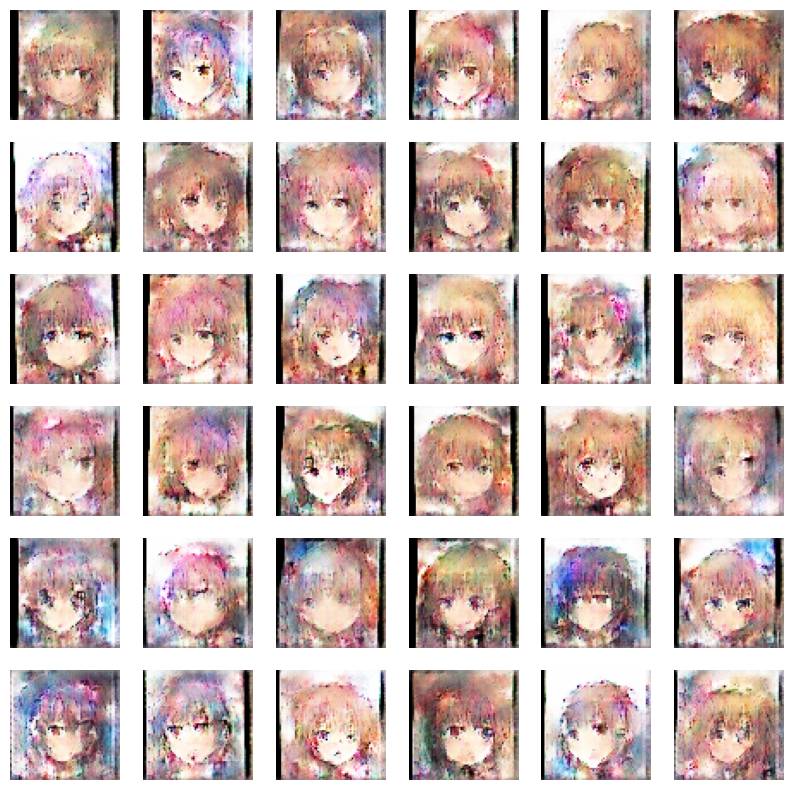

In [2]:
# Generating 36 Random Images with DCGAN
from keras.models import load_model
generator = load_model('dcgan_anime_checkpoint_1.h5', custom_objects={'tanh': tf.keras.activations.tanh})

plt.figure(figsize=(10, 10))

for i in range(36):
    plt.subplot(6, 6, i + 1)
    # Generate random noise for each image
    noise = tf.random.normal([1, 300])
    # mg = dcgan.generator(noise) # model vừa train xong
    mg = generator(noise)
    # Denormalize
    mg = (mg * 127.5) + 127.5

    mg.numpy()
    image = Image.fromarray(np.uint8(mg[0]))

    plt.imshow(image)
    plt.axis('off')

plt.show()

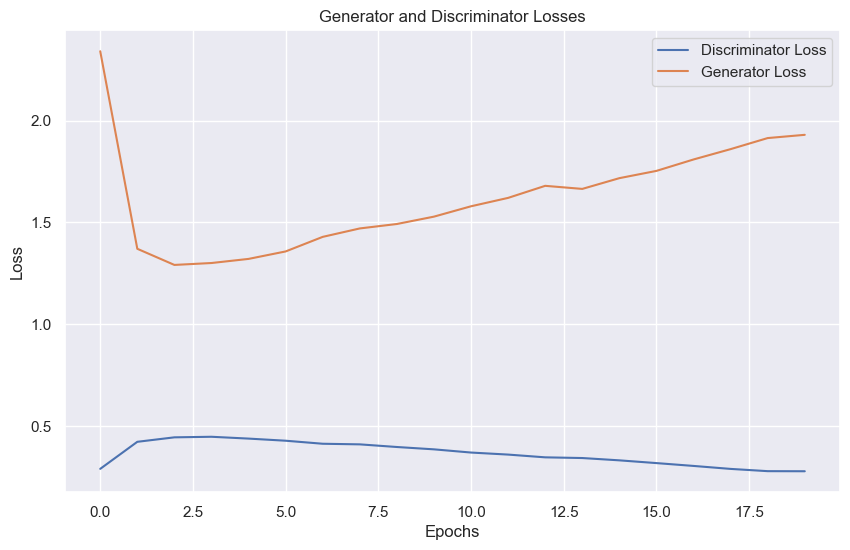

In [40]:
import matplotlib.pyplot as plt

# Function to create a figure for the losses
def create_loss_figure(d_loss_values, g_loss_values):
    plt.figure(figsize=(10, 6))
    plt.plot(d_loss_values, label='Discriminator Loss')
    plt.plot(g_loss_values, label='Generator Loss')
    plt.title('Generator and Discriminator Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Access the loss values from the history
d_loss_values = history.history['d_loss']
g_loss_values = history.history['g_loss']

# Call the create_loss_figure function with the loss values
create_loss_figure(d_loss_values, g_loss_values)